# Model  - Topic modeling (NLP)

<b>Topic modeling<b>

<b>Goal</b>:    
Build a model capable of predicting the topic of a text. 

<b>Bonus</b>: sentiment analysis
    
<b>Difficulty</b>:    
- easy using supervised learning
- medium using LDA (unsupervised learning)
- hard using Word embedding (Word2Vec) and t-SNE

<b>Dataset</b>:<br>
Research papers: use the dataset to predict the topic of a scientific paper using its abstract. First, create a model using the tags (supervised learning). then, try to use unsupervised learning techniques to find topics and compare these topics with the tags of the dataset


In [17]:
# basic
import numpy as np
import pandas as pd

# vizualisation
import matplotlib.pyplot as plt
import seaborn as sns
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# gensim
from gensim import corpora, models, similarities, downloader
from gensim.models import CoherenceModel
import gensim

# nltk
import nltk
from nltk.corpus import stopwords
from nltk.stem import *
from nltk.tokenize import word_tokenize

# wordcloud
from wordcloud import WordCloud, STOPWORDS

import warnings
warnings.filterwarnings('ignore')

In [9]:
# read CSV

df_train = pd.read_csv('data/Train.csv')

# Preprocessing

**Identifier les stopwords**

In [3]:
# stopwords

nltk.download('stopwords')

stop=set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


**Création du corpus**

In [4]:
# corpus

corpus=[]
new= df_train['ABSTRACT'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

**Import de la librairie NLTK et ses ressources lexicales**

In [5]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\veron\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Tokenisation, lemmatisation et suppression des stopwords**

In [6]:
# tokenize / remove stopwords / lemmatize

def preprocess_news(df):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for news in df_train['ABSTRACT']:
        words=[w for w in word_tokenize(news) if (w not in stop)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_news(df_train)

**Conversion du corpus en dictionnaire puis bag of words**

In [7]:
# bag of words" avec gensim

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

# Modeling / Modèle non supervisé

In [8]:
# topic modeling avec LDA

lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 25, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)

# show topics 

lda_model.show_topics()

[(15,
  '0.010*"inside" + 0.009*"curve" + 0.007*"transit" + 0.007*"considering" + 0.005*"system" + 0.005*"resonance" + 0.004*"circuit" + 0.004*"functional" + 0.004*"eccentricity" + 0.004*"anomaly"'),
 (11,
  '0.023*"considering" + 0.016*"method" + 0.014*"inside" + 0.011*"patient" + 0.011*"help" + 0.009*"disease" + 0.008*"clinical" + 0.008*"code" + 0.007*"face" + 0.007*"model"'),
 (6,
  '0.029*"inside" + 0.019*"considering" + 0.019*"data" + 0.018*"learning" + 0.018*"model" + 0.013*"network" + 0.012*"method" + 0.008*"feature" + 0.007*"task" + 0.007*"deep"'),
 (23,
  '0.032*"inside" + 0.022*"learning" + 0.021*"network" + 0.017*"considering" + 0.015*"neural" + 0.014*"task" + 0.013*"method" + 0.011*"agent" + 0.011*"model" + 0.010*"deep"'),
 (19,
  '0.029*"algorithm" + 0.024*"gradient" + 0.022*"inside" + 0.021*"considering" + 0.017*"stochastic" + 0.014*"convergence" + 0.012*"method" + 0.012*"optimization" + 0.010*"rate" + 0.009*"learning"'),
 (5,
  '0.055*"wave" + 0.055*"black" + 0.045*"hole

**Visualisation du topic modeling avec LDA**

In [13]:
# visualisation

pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.187787  0.119702       1        1  12.471655
22    -0.182159 -0.046257       2        1  11.160281
4     -0.105469 -0.039580       3        1  10.011772
18    -0.110836 -0.109135       4        1   9.386352
17    -0.156130 -0.031080       5        1   9.026070
23    -0.149832  0.112729       6        1   5.380603
9     -0.130646  0.070708       7        1   5.094797
24    -0.079569 -0.094785       8        1   4.550624
14    -0.114825  0.089979       9        1   3.980258
1     -0.124129  0.141009      10        1   3.913550
2     -0.059894 -0.252724      11        1   3.732977
12    -0.047965 -0.272257      12        1   3.280221
20    -0.077391  0.058999      13        1   3.159811
8     -0.089182  0.053780      14        1   3.135155
7     -0.030131  0.046141      15        1   2.752795
19    -0.083259  0.011749      16        1   2.414809
21    -0.022440 -0.011936      17        1   1.987314
11    -0.000251  0.111798      18        1   1.444488
3      0.070394 -0.068035      19        1   0.968180
16     0.183240  0.045496      20        1   0.611793
15     0.183092  0.012559      21        1   0.574498
13     0.315196 -0.016441      22        1   0.290772
10     0.303622  0.034105      23        1   0.290536
5      0.349579  0.006702      24        1   0.197242
0      0.346772  0.026771      25        1   0.183446, topic_info=            Term          Freq         Total Category  logprob  loglift
419      network   7132.000000   7132.000000  Default  30.0000  30.0000
59        inside  44949.000000  44949.000000  Default  29.0000  29.0000
129    algorithm   6034.000000   6034.000000  Default  28.0000  28.0000
569     learning   5407.000000   5407.000000  Default  27.0000  27.0000
55         image   2808.000000   2808.000000  Default  26.0000  26.0000
...          ...           ...           ...      ...      ...      ...
18748        ifs      5.615272     17.749544  Topic25  -6.1231   5.1501
4628    filament      6.261944     85.469041  Topic25  -6.0141   3.6873
7450     unifies      5.617001     30.447908  Topic25  -6.1228   4.6108
9794   disparity      5.493820     22.601681  Topic25  -6.1450   4.8866
6440        spot      5.541952     60.194146  Topic25  -6.1363   3.9158

[1852 rows x 6 columns], token_table=       Topic      Freq            Term
term                                  
27364     11  0.968503         -\delta
9943      11  0.928371           -adic
9943      12  0.047609           -adic
3716       5  0.948784    -approximate
2631       5  0.990324  -approximation
...      ...       ...             ...
5055      15  0.965609             xps
11811     15  0.913941            ysos
5307      11  0.947302            zeta
5307      23  0.031577            zeta
17607      8  0.972719           zonal

[7130 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 23, 5, 19, 18, 24, 10, 25, 15, 2, 3, 13, 21, 9, 8, 20, 22, 12, 4, 17, 16, 14, 11, 6, 1])

**Score de cohérence : 0.46**

In [18]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=corpus, dictionary=dic, coherence='c_v')

In [19]:
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.46128133327485604


**Visualisation avec Wordcloud**

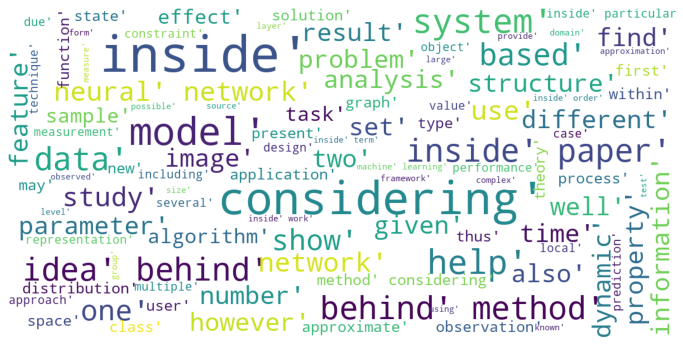

In [15]:
# worldcloud

from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [21]:
import pickle
with open("model.pkl", "wb") as file:
    pickle.dump(lda_model, file)